### 1. Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


### 2. Data processing

### 2.1 Read in data

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### 2.2 Feature selection: excluding columns of 'RowNumber', 'CustomerId', 'Surname'

In [7]:
X = dataset.iloc[:, 3: 13].values

In [8]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [9]:
y = dataset.iloc[:, 13].values

In [10]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

### 2.3 categorical encoding: column Geography and Gender

In [11]:
X[:, 1:2].shape

(10000, 1)

In [12]:
#Label encoder for 'country', 1 is the index of 'country' col
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [13]:
X

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [14]:
#Label encoder for 'Gender'
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [15]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [16]:
X.shape

(10000, 10)

#### remove genography column

In [17]:
X_temp = np.delete(X, 1, 1)
X_temp

array([[619, 0, 42, ..., 1, 1, 101348.88],
       [608, 0, 41, ..., 0, 1, 112542.58],
       [502, 0, 42, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 36, ..., 0, 1, 42085.58],
       [772, 1, 42, ..., 1, 0, 92888.52],
       [792, 0, 28, ..., 1, 0, 38190.78]], dtype=object)

### 2.4 One-hot encoding: column Geography 

In [18]:
#One-hot encoding 'country' col
onehotencoder = OneHotEncoder()
geography_array = onehotencoder.fit_transform(X[:, 1:2]).toarray()

### 2.5 Avoid dummy data trap

In [19]:
geography_array = geography_array[: , 1:3]
geography_array

array([[0., 0.],
       [0., 1.],
       [0., 0.],
       ...,
       [0., 0.],
       [1., 0.],
       [0., 0.]])

In [20]:
X_final = np.concatenate( (geography_array, X_temp),  axis = 1)
X_final

array([[0.0, 0.0, 619, ..., 1, 1, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0, 38190.78]], dtype=object)

### 2.6 Data split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2, random_state = 0)

### 2.7 Feature scaling

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 3.Model building

In [23]:
#initialize the nerual network
classifier = Sequential()
#add input layer and first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))
# #add dropout layer
# classifier.add(Dropout(p =0.1))
#add 2nd hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
# classifier.add(Dropout(p =0.1))
#add output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Users\kx764qe\AppData\Local\Continuum\anaconda3\envs\courses\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\kx764qe\AppData\Local\Continuum\anaconda3\envs\courses\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\kx764qe\AppData\Local\Continuum\anaconda3\envs\courses\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


In [24]:
classifier.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
8000/8000 [==============================] - 1s 157us/step - loss: 0.4970 - acc: 0.7957
Epoch 2/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.4181 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 111us/step - loss: 0.4079 - acc: 0.8014
Epoch 4/100
8000/8000 [==============================] - 1s 108us/step - loss: 0.3982 - acc: 0.8295
Epoch 5/100
8000/8000 [==============================] - 1s 107us/step - loss: 0.3900 - acc: 0.8300
Epoch 6/100
8000/8000 [==============================] - 1s 107us/step - loss: 0.3828 - acc: 0.8331
Epoch 7/100
8000/8000 [==============================] - 1s 109us/step - loss: 0.3771 - acc: 0.8429
Epoch 8/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.3737 - acc: 0.8455
Epoch 9/100
8000/8000 [==============================] - 1s 152us/step - loss: 0.3692 - acc: 0.8490
Epoch 10/100
8000/8000 [==============================] - 2s 268us/step - loss: 0.3656 - acc: 0.848

8000/8000 [==============================] - 1s 145us/step - loss: 0.3431 - acc: 0.8602
Epoch 80/100
8000/8000 [==============================] - 1s 138us/step - loss: 0.3439 - acc: 0.8620
Epoch 81/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.3436 - acc: 0.8611
Epoch 82/100
8000/8000 [==============================] - 1s 159us/step - loss: 0.3436 - acc: 0.8595
Epoch 83/100
8000/8000 [==============================] - 1s 166us/step - loss: 0.3434 - acc: 0.8602
Epoch 84/100
8000/8000 [==============================] - 1s 162us/step - loss: 0.3429 - acc: 0.8616
Epoch 85/100
8000/8000 [==============================] - 2s 195us/step - loss: 0.3427 - acc: 0.8620
Epoch 86/100
8000/8000 [==============================] - 1s 168us/step - loss: 0.3445 - acc: 0.8592 0s - loss: 0.3425 - acc
Epoch 87/100
8000/8000 [==============================] - 2s 202us/step - loss: 0.3432 - acc: 0.8631
Epoch 88/100
8000/8000 [==============================] - 2s 215us/step - loss: 

### 4. model prediction

In [26]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

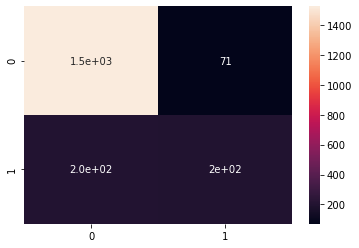

In [27]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

### New data prediction

## 
geography: France
credit score: 600
gender: male
age: 40
tenure: 3
balance: 60000
number of product: 2
has credit card: yes
is active member: yes
estimated salary: 50000


France is encoded as (0, 0), male is encoded as 1

In [28]:
new_customer = [[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]] 
new_customer = sc.transform(sc.transform(new_customer))

In [29]:
new_prediction = classifier.predict(new_customer)

the customer is not leaving the bank

In [30]:
new_prediction

array([[0.00882454]], dtype=float32)

In [31]:
new_prediction = (new_prediction > 0.5)

In [32]:
new_prediction

array([[False]])